In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data from source

In [8]:
# Reading data from remote link
url=r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

## Checking data for its use

In [10]:
print("Import of Data is Successfull")
data

Import of Data is Successfull


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
#summarization of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Getting the Statistical Information of the dataframe

In [12]:
#summarising the tatistical details
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#finding mean of each column of the dataset
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [14]:
#returning null values to the dataframe
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization
### Displaying Grid Representation of Hours versus Scores

Plotting our data points on a 2D graph to gain more information about our dataset and find relationship between the provided data.

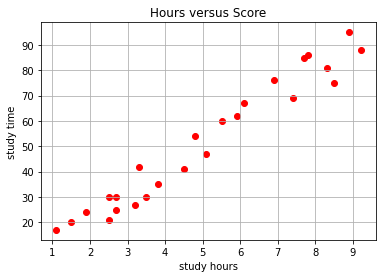

In [17]:
#plotting the distribution of scores
plt.scatter(x=data.Hours, y=data.Scores, c="red")
plt.grid()
plt.title("Hours versus Score")
plt.xlabel("study hours")
plt.ylabel("study time")
plt.show()

The plotted graph shows that there is a positive linear relation between the number of hours studied and percentage of score.

## Dividing the data into "attributes" (inputs) and "labels" (outputs)

In [18]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

## Spliting this data into training and test sets

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [19]:
#training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
print("Shape of x_Train", x_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of x_Test", x_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of x_Train (20,)
Shape of y_Train (20,)
Shape of x_Test (5,)
Shape of y_Test (5,)


## Prediction model for predicting Scores

In [22]:
from sklearn.linear_model import LinearRegression
pred_model = LinearRegression() 
pred_model.fit(x.reshape(-1,1), y)

LinearRegression()

In [23]:
pred_model.coef_

array([9.77580339])

In [24]:
pred_model.intercept_

2.483673405373196

## Plotting Prediction Model as Scatter Plot

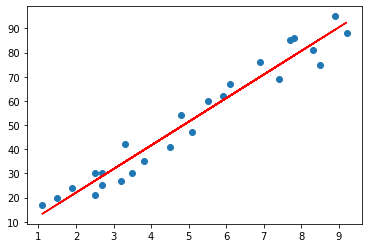

In [25]:
# Plotting the regression line
line = pred_model.coef_*x+pred_model.intercept_
plt.scatter(x,y)
plt.plot(x, line, c="red")
plt.show()

## Predicting Scores

Now that we have trained our algorithm, it's time to make some predictions.

In [27]:
y_pred = pred_model.predict(x_test.reshape(-1,1))
y_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [35]:
# Comparing Actual vs Predicted
print("Actual Values and Predcited Values")

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 


Actual Values and Predcited Values


,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


## Grid Representation of Actual values nad Predicted values

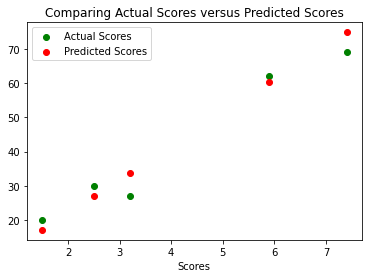

In [40]:
plt.title("Comparing Actual Scores versus Predicted Scores")
plt.scatter(x_test, y_test, c="green", label="Actual Scores")
plt.scatter(x_test, y_pred, c="red", label="Predicted Scores")
plt.xlabel("Hours")
plt.xlabel("Scores")
plt.legend()
plt.show()

## Checking Accuracy

In [41]:
pred_model.score(x_test.reshape(-1,1), y_test)

0.9491748734859171

## Calculating Root Mean Square Error

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 20.1389481299402
RMSE: 4.487643939746134


## Predicting Score for 9.25 of Study Hours

In [47]:
print(f"Number of Study Hours = 9.25")
print(f"Marks Obtained will be: {pred_model.predict([[9.25]])[0]}")

Number of Study Hours = 9.25
Marks Obtained will be: 92.90985477015731
